In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
%matplotlib inline

Task 1: Data pre-processing and data exploration (6 marks)

A:

In [2]:
train_var = pd.read_csv('trainingSet.csv')
test_var = pd.read_csv('testingSet.csv')

In [4]:
train_var.head()

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
0,0,1,0,0,1,1,1,7,12,19,7,4,9,1
1,2,1,0,0,1,1,1,6,8,8,6,4,10,-1
2,3,9,0,3,1,1,1,24,22,33,13,11,33,1
3,0,1,0,0,1,1,1,1,1,2,1,2,4,-1
4,0,1,0,0,1,1,1,7,10,15,8,8,12,-1


B:

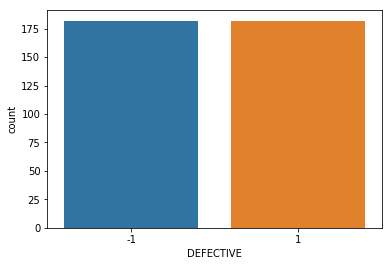

In [18]:
sns.countplot(x="DEFECTIVE", data=train_var)
plt.show()

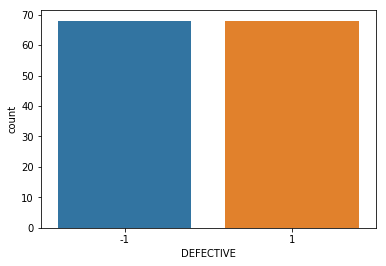

In [11]:
sns.countplot(x="DEFECTIVE", data=test_var)
plt.show()

C:

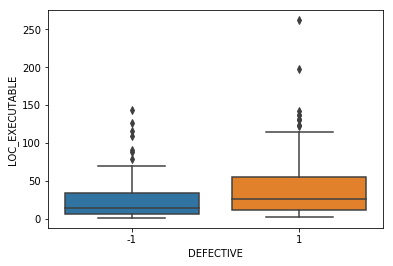

In [19]:
sns.boxplot(x='DEFECTIVE', y='LOC_EXECUTABLE', data= train_var)
plt.show()

D:

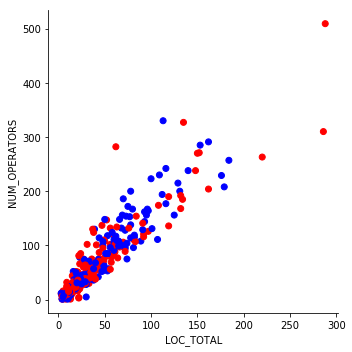

In [46]:
sns.FacetGrid(train_var, size = 5).map(plt.scatter, 'LOC_TOTAL', 'NUM_OPERATORS', color = ['red','blue'])
plt.show()

E:

In [22]:
inputs = train_var.iloc[:,:13]
labels = train_var.iloc[:,-1]

In [23]:
inputs.head()

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL
0,0,1,0,0,1,1,1,7,12,19,7,4,9
1,2,1,0,0,1,1,1,6,8,8,6,4,10
2,3,9,0,3,1,1,1,24,22,33,13,11,33
3,0,1,0,0,1,1,1,1,1,2,1,2,4
4,0,1,0,0,1,1,1,7,10,15,8,8,12


In [24]:
x_train, x_val, y_train, y_val = train_test_split(inputs, labels, test_size=0.55)

In [25]:
x_train.shape

(163, 13)

In [26]:
x_val.shape

(201, 13)

Task 2: Do a principal component analysis (10 marks) 

A:

In [27]:
scalar = StandardScaler()
normalized_data = scalar.fit_transform(inputs) # Comments:Standardising the data before applying PCA. It's important to standardize the data before PCA to make sure all our features are in same scale.

In [28]:
pca = PCA()
pca_train = pca.fit_transform(normalized_data)

B:

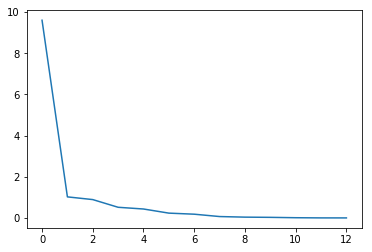

In [29]:
plt.plot(pca.explained_variance_)
plt.show()

C:

In [30]:
test_inputs = test_var.iloc[:,:-1]
test_labels = test_var.iloc[:,-1]

In [32]:
normalized_test_data = scalar.fit_transform(test_inputs)

In [33]:
pca1 = pca.fit(normalized_data)
pca_test = pca1.transform(normalized_test_data)

D:

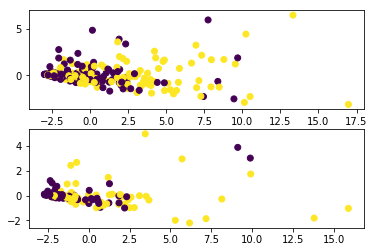

In [34]:
fig,ax = plt.subplots(2)
ax[0].scatter(pca_train[:,0],pca_train[:,1],c=labels)
ax[1].scatter(pca_test[:,0],pca_test[:,1],c=test_labels)
plt.show()

Task 3: Do a classification using the Naïve Bayes Classification model (4 marks)

In [35]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for i in alpha:
    model = MultinomialNB(alpha=i).fit(inputs, labels)
    preds = model.predict(inputs)
    accuracy = accuracy_score(labels, preds)
    print('for alpha =',i, 'accuracy is', accuracy)

for alpha = 0.001 accuracy is 0.6401098901098901
for alpha = 0.01 accuracy is 0.6401098901098901
for alpha = 0.1 accuracy is 0.6401098901098901
for alpha = 1 accuracy is 0.6401098901098901
for alpha = 10 accuracy is 0.6346153846153846
for alpha = 100 accuracy is 0.6181318681318682
for alpha = 1000 accuracy is 0.5879120879120879


In [36]:
model = MultinomialNB(alpha=1).fit(inputs, labels)
preds = model.predict(test_inputs)
accuracy = accuracy_score(test_labels, preds) 
print('test accuracy is', accuracy)

test accuracy is 0.6029411764705882


Task 4: Investigate how the number of features in the training dataset affects the model performance on the validation set (16 marks)


A:


In [38]:
train_accuracy = []

model = MultinomialNB(alpha=1)

In [40]:
model.fit(x_train.iloc[:,:1], y_train)
preds = model.predict(x_train.iloc[:,:1])
accuracy1 = accuracy_score(y_train, preds)
train_accuracy.append(accuracy1)
print('accuracy 1:', accuracy1)

model.fit(x_train.iloc[:,:2], y_train)
preds = model.predict(x_train.iloc[:,:2])
accuracy2 = accuracy_score(y_train, preds)
train_accuracy.append(accuracy2)
print('accuracy 2:', accuracy2)

model.fit(x_train.iloc[:,:3], y_train)
preds = model.predict(x_train.iloc[:,:3])
accuracy3 = accuracy_score(y_train, preds)
train_accuracy.append(accuracy3)
print('accuracy 3:', accuracy3)

model.fit(x_train.iloc[:,:4], y_train)
preds = model.predict(x_train.iloc[:,:4])
accuracy4 = accuracy_score(y_train, preds)
train_accuracy.append(accuracy4)
print('accuracy 4:', accuracy4)

model.fit(x_train.iloc[:,:5], y_train)
preds = model.predict(x_train.iloc[:,:5])
accuracy5 = accuracy_score(y_train, preds)
train_accuracy.append(accuracy5)
print('accuracy 5:', accuracy5)

model.fit(x_train.iloc[:,:6], y_train)
preds = model.predict(x_train.iloc[:,:6])
accuracy6 = accuracy_score(y_train, preds)
train_accuracy.append(accuracy6)
print('accuracy 6:', accuracy6)

model.fit(x_train.iloc[:,:7], y_train)
preds = model.predict(x_train.iloc[:,:7])
accuracy7 = accuracy_score(y_train, preds)
train_accuracy.append(accuracy7)
print('accuracy 7:', accuracy7)

model.fit(x_train.iloc[:,:8], y_train)
preds = model.predict(x_train.iloc[:,:8])
accuracy8 = accuracy_score(y_train, preds)
train_accuracy.append(accuracy8)
print('accuracy 8:', accuracy8)

model.fit(x_train.iloc[:,:9], y_train)
preds = model.predict(x_train.iloc[:,:9])
accuracy9 = accuracy_score(y_train, preds)
train_accuracy.append(accuracy9)
print('accuracy 9:', accuracy9)

model.fit(x_train.iloc[:,:10], y_train)
preds = model.predict(x_train.iloc[:,:10])
accuracy10 = accuracy_score(y_train, preds)
train_accuracy.append(accuracy10)
print('accuracy 10:', accuracy10)

model.fit(x_train.iloc[:,:11], y_train)
preds = model.predict(x_train.iloc[:,:11])
accuracy11 = accuracy_score(y_train, preds)
train_accuracy.append(accuracy11)
print('accuracy 11:', accuracy11)

model.fit(x_train.iloc[:,:12], y_train)
preds = model.predict(x_train.iloc[:,:12])
accuracy12 = accuracy_score(y_train, preds)
train_accuracy.append(accuracy12)
print('accuracy 12:', accuracy12)

model.fit(x_train.iloc[:,:13], y_train)
preds = model.predict(x_train.iloc[:,:13])
accuracy13 = accuracy_score(y_train, preds)
train_accuracy.append(accuracy13)
print('accuracy 13:', accuracy13)

accuracy 1: 0.5276073619631901
accuracy 2: 0.4785276073619632
accuracy 3: 0.5337423312883436
accuracy 4: 0.5276073619631901
accuracy 5: 0.5398773006134969
accuracy 6: 0.5398773006134969
accuracy 7: 0.6134969325153374
accuracy 8: 0.6073619631901841
accuracy 9: 0.5828220858895705
accuracy 10: 0.5950920245398773
accuracy 11: 0.6503067484662577
accuracy 12: 0.6441717791411042
accuracy 13: 0.6257668711656442


In [41]:
val_accuracy = []

model = MultinomialNB(alpha=1)

In [42]:
model.fit(x_train.iloc[:,:1], y_train)
preds = model.predict(x_val.iloc[:,:1])
accuracy1 = accuracy_score(y_val, preds)
val_accuracy.append(accuracy1)
print('accuracy 1:', accuracy1)

model.fit(x_train.iloc[:,:2], y_train)
preds = model.predict(x_val.iloc[:,:2])
accuracy2 = accuracy_score(y_val, preds)
val_accuracy.append(accuracy2)
print('accuracy 2:', accuracy2)

model.fit(x_train.iloc[:,:3], y_train)
preds = model.predict(x_val.iloc[:,:3])
accuracy3 = accuracy_score(y_val, preds)
val_accuracy.append(accuracy3)
print('accuracy 3:', accuracy3)

model.fit(x_train.iloc[:,:4], y_train)
preds = model.predict(x_val.iloc[:,:4])
accuracy4 = accuracy_score(y_val, preds)
val_accuracy.append(accuracy4)
print('accuracy 4:', accuracy4)

model.fit(x_train.iloc[:,:5], y_train)
preds = model.predict(x_val.iloc[:,:5])
accuracy5 = accuracy_score(y_val, preds)
val_accuracy.append(accuracy5)
print('accuracy 5:', accuracy5)

model.fit(x_train.iloc[:,:6], y_train)
preds = model.predict(x_val.iloc[:,:6])
accuracy6 = accuracy_score(y_val, preds)
val_accuracy.append(accuracy6)
print('accuracy 6:', accuracy6)

model.fit(x_train.iloc[:,:7], y_train)
preds = model.predict(x_val.iloc[:,:7])
accuracy7 = accuracy_score(y_val, preds)
val_accuracy.append(accuracy7)
print('accuracy 7:', accuracy7)

model.fit(x_train.iloc[:,:8], y_train)
preds = model.predict(x_val.iloc[:,:8])
accuracy8 = accuracy_score(y_val, preds)
val_accuracy.append(accuracy8)
print('accuracy 8:', accuracy8)

model.fit(x_train.iloc[:,:9], y_train)
preds = model.predict(x_val.iloc[:,:9])
accuracy9 = accuracy_score(y_val, preds)
val_accuracy.append(accuracy9)
print('accuracy 9:', accuracy9)

model.fit(x_train.iloc[:,:10], y_train)
preds = model.predict(x_val.iloc[:,:10])
accuracy10 = accuracy_score(y_val, preds)
val_accuracy.append(accuracy10)
print('accuracy 10:', accuracy10)

model.fit(x_train.iloc[:,:11], y_train)
preds = model.predict(x_val.iloc[:,:11])
accuracy11 = accuracy_score(y_val, preds)
val_accuracy.append(accuracy11)
print('accuracy 11:', accuracy11)

model.fit(x_train.iloc[:,:12], y_train)
preds = model.predict(x_val.iloc[:,:12])
accuracy12 = accuracy_score(y_val, preds)
val_accuracy.append(accuracy12)
print('accuracy 12:', accuracy12)

model.fit(x_train.iloc[:,:13], y_train)
preds = model.predict(x_val.iloc[:,:13])
accuracy13 = accuracy_score(y_val, preds)
val_accuracy.append(accuracy13)
print('accuracy 13:', accuracy13)

accuracy 1: 0.47761194029850745
accuracy 2: 0.4577114427860697
accuracy 3: 0.4975124378109453
accuracy 4: 0.5124378109452736
accuracy 5: 0.5124378109452736
accuracy 6: 0.5323383084577115
accuracy 7: 0.5920398009950248
accuracy 8: 0.5870646766169154
accuracy 9: 0.6666666666666666
accuracy 10: 0.6716417910447762
accuracy 11: 0.6616915422885572
accuracy 12: 0.6517412935323383
accuracy 13: 0.6467661691542289


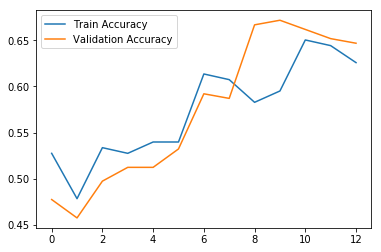

In [43]:
plt.plot(train_accuracy, label= 'Train Accuracy')
plt.plot(val_accuracy, label= 'Validation Accuracy')
plt.legend()

plt.show()

B:

The number of features I'd like to chose are 10 since, by using 10 features I've seen that validation set has the highest accuracy. Even though the train model with 10 features has a accuracy of 59.5% the validation model has a accuracy of 67%

C:

In [44]:
model.fit(inputs.iloc[:,:10], labels)
preds = model.predict(inputs.iloc[:,:10])
accuracy = accuracy_score(labels, preds)
print('train accuracy:', accuracy)

train accuracy: 0.6236263736263736


In [45]:
model.fit(inputs.iloc[:,:10], labels)
preds = model.predict(test_inputs.iloc[:,:10])
accuracy = accuracy_score(test_labels, preds)
print('test accuracy:', accuracy)

test accuracy: 0.6029411764705882


Task 5: Summarize your findings, write your conclusions using critical thinking (no more than 100 words) and write it down in your Jupyter notebook (4 marks).


By applying the multinomial Naive Bayes on this data set, I've found that using 0nly 10 features from the data gave me the best validation results. Therefore, I've used 10 features to run the Multinomial Naive Bayes on the original data set. In the end, I've seen the accuracy rates of 62.3% for training data and 60.2% for testing data.

Conclusion: this Naive Bayes model can predict the unseen data with a 60.2% accuracy rate.